<a href="https://colab.research.google.com/github/shubh28012004/Predicting-House-Prices/blob/main/CODEX_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv("/content/house_prices.csv")

In [3]:
df.head()

,SquareFootage,HousePrice
0,1500.0,215000.0
1,2000.0,275000.0
2,1200.0,150000.0
3,1800.0,230000.0
4,2500.0,320000.0


In [4]:
df.tail()

,SquareFootage,HousePrice
48,NaN,200000.0
49,1250.0,155000.0
50,1950.0,235000.0
51,1450.0,165000.0
52,2100.0,270000.0


# EXPLORATORY DATA ANALYSIS

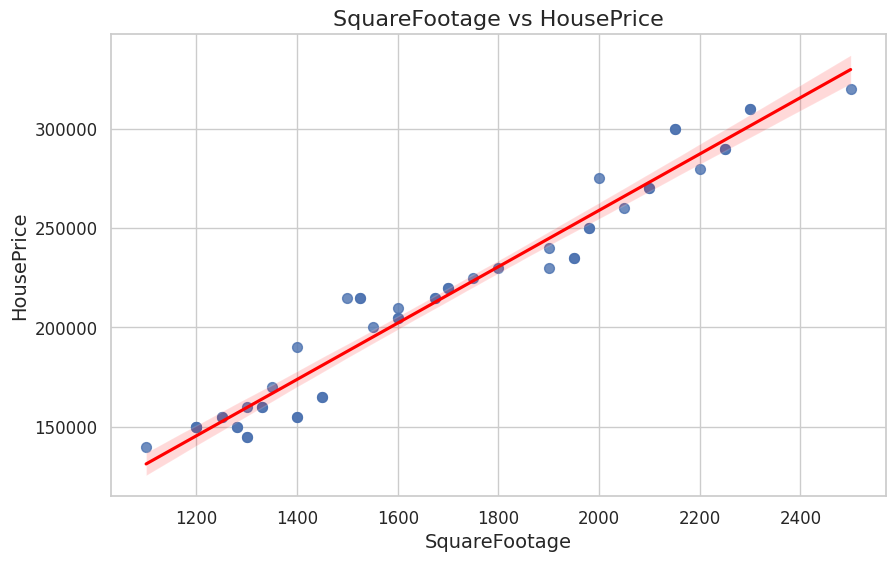

In [8]:
# Set seaborn style
sns.set(style="whitegrid")

# Visualize the relationship between SquareFootage and HousePrice
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x='SquareFootage', y='HousePrice', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})


plt.title('SquareFootage vs HousePrice', fontsize=16)
plt.xlabel('SquareFootage', fontsize=14)
plt.ylabel('HousePrice', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


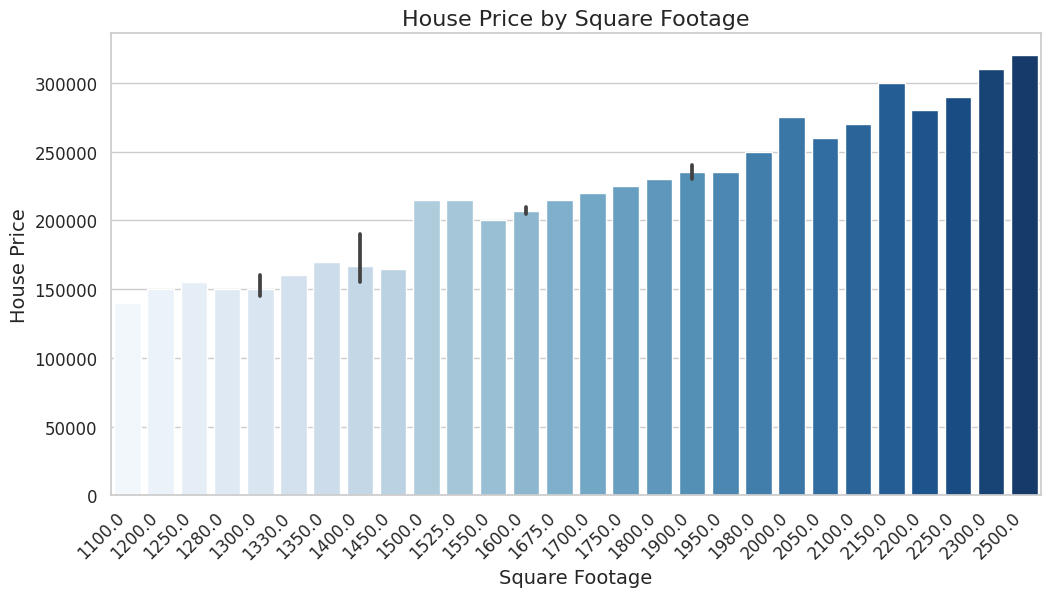

In [12]:
# Set seaborn style
sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
sns.barplot(x='SquareFootage', y='HousePrice', data=df, palette="Blues")


plt.title('House Price by Square Footage', fontsize=16)
plt.xlabel('Square Footage', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)


plt.show()


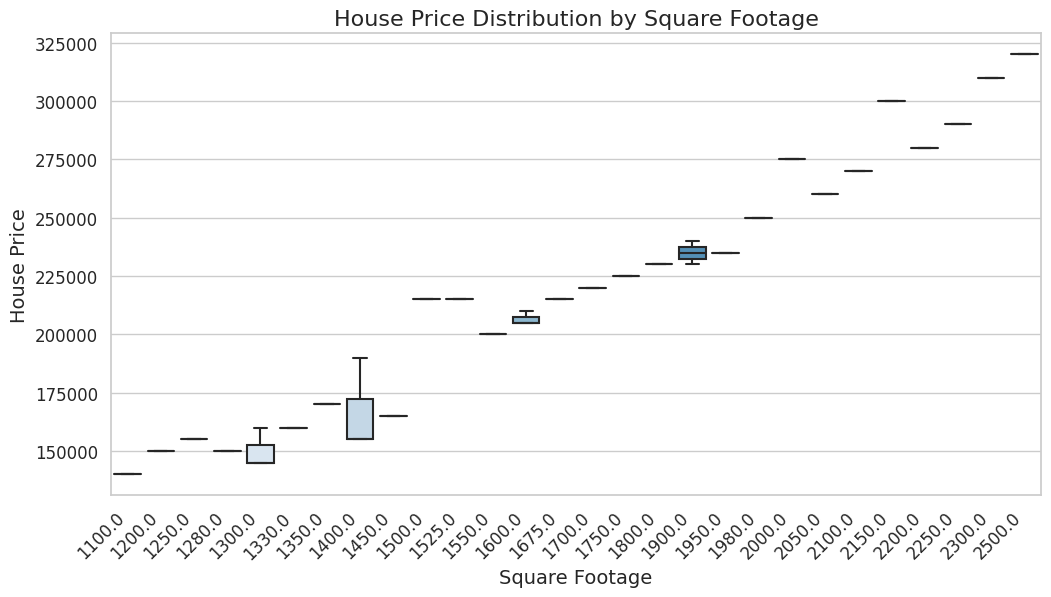

In [14]:

sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
sns.boxplot(x='SquareFootage', y='HousePrice', data=df, palette="Blues")


plt.title('House Price Distribution by Square Footage', fontsize=16)
plt.xlabel('Square Footage', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)


plt.show()


# DATA PRE PROCESSING

In [15]:
df.isna().sum()

SquareFootage       1
HousePrice          2
SquareFootageBin    1
dtype: int64

In [16]:
df.head()

,SquareFootage,HousePrice,SquareFootageBin
0,1500.0,215000.0,"(1000, 2000]"
1,2000.0,275000.0,"(1000, 2000]"
2,1200.0,150000.0,"(1000, 2000]"
3,1800.0,230000.0,"(1000, 2000]"
4,2500.0,320000.0,"(2000, 3000]"


In [18]:
df.drop('SquareFootageBin', axis=1, inplace=True)


In [21]:
df.head()

,SquareFootage,HousePrice
0,1500.0,215000.0
1,2000.0,275000.0
2,1200.0,150000.0
3,1800.0,230000.0
4,2500.0,320000.0


In [20]:
df.isna().sum()

SquareFootage    1
HousePrice       2
dtype: int64

In [22]:
# applying forward filling technique to fill the null values
df.fillna(method = 'ffill' , inplace=True)

In [23]:
df.isna().sum()

SquareFootage    0
HousePrice       0
dtype: int64

In [25]:
X = df['SquareFootage'].values.reshape(-1, 1)
y = df['HousePrice'].values


In [26]:
#Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train , y_train)

LinearRegression()

# Model evalution

In [29]:
y_pred = model.predict(X_test)

In [30]:
# Evaluate the model's performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Analyze the regression coefficients
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

Mean Absolute Error: 11540.03150424774
Mean Squared Error: 191783174.6787053
Root Mean Squared Error: 13848.580240541098
Intercept: -10786.152056575054
Coefficient: [129.57155712]


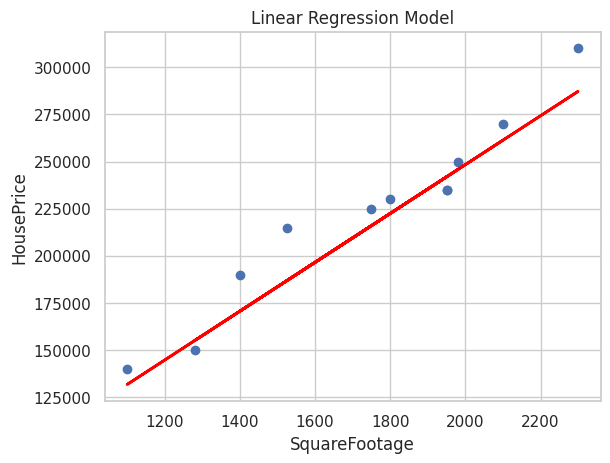

In [31]:
# Plot the regression line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Linear Regression Model')
plt.xlabel('SquareFootage')
plt.ylabel('HousePrice')
plt.show()

In [32]:
# Use the trained model to make predictions on new data
new_square_footage = np.array([[1500]])  # Replace with the desired square footage
predicted_price = model.predict(new_square_footage)
print('Predicted House Price:', predicted_price[0])

Predicted House Price: 183571.18362481814
